<a href="https://colab.research.google.com/github/Mai-Binh-Nam/Hand-on_DataAnalysisVEF/blob/master/Lecture_5_Linear_Regression_Practice_Questions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Library & Data

In [ ]:
import numpy as np
import pandas as pd
import datetime as dt

import matplotlib.pyplot as plt
import seaborn as sns
# Option to specify the default size of plots by seaborn
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [ ]:
# Orders
orders = pd.read_csv('https://raw.githubusercontent.com/thuynh386/olist_ecommerce_dataset/master/olist_orders_dataset.csv')
order_items = pd.read_csv('https://raw.githubusercontent.com/thuynh386/olist_ecommerce_dataset/master/olist_order_items_dataset.csv')
order_reviews = pd.read_csv('https://raw.githubusercontent.com/thuynh386/olist_ecommerce_dataset/master/olist_order_reviews_dataset.csv')
order_payments = pd.read_csv('https://raw.githubusercontent.com/thuynh386/olist_ecommerce_dataset/master/olist_order_payments_dataset.csv')

# Customers and Sellers
customers = pd.read_csv('https://raw.githubusercontent.com/thuynh386/olist_ecommerce_dataset/master/olist_customers_dataset.csv')
sellers = pd.read_csv('https://raw.githubusercontent.com/thuynh386/olist_ecommerce_dataset/master/olist_sellers_dataset.csv')

# Products and Categories
products = pd.read_csv('https://raw.githubusercontent.com/thuynh386/olist_ecommerce_dataset/master/olist_products_dataset.csv')
product_translation = pd.read_csv('https://raw.githubusercontent.com/thuynh386/olist_ecommerce_dataset/master/product_category_name_translation.csv')

# Problem 1: Using Linear Regression to predict customers' total purchase next month

Assuming that we are on 2018-09-30 and we would like to predict the total purchases of customers for next month. Use linear regression model to do the task.

## Data Exploration to understand the dataset

See the excel file [here](https://docs.google.com/spreadsheets/d/1KawVe57InaVnU19MVwutDzfMBHG6zDLZwDa3-zzu360/edit?usp=sharing)

## Define dependent variable and independent variables (or features) for Linear Regression

In order to predict the order values that a customer is going to buy for the next month, we can think about his or her characteristics such as:

1. Their demographics information: Age, Gender, Location
1. How long have they been with the platform?
1. How many orders did they make last month, the month before that, the month even before that?
1. Of what value?
1. Did they use a lot of vouchers in making purchases?
1. Have they used a credit card to pay for previous orders?
1. ....

This list can go on. It's up to you to think of others.

Underlying each of these variables, we are forming a hypothesis about a linear relationship between them and the monthly order value (which is our dependent variable).

## Generate, Combine & Clean data

The purpose of the regression is to predict next month's purchases by a customer. Therefore, we need to have a `customer_master_dataset` in which each customer is represented by 1 row and each predictor we have listed above is a column describing that customer in that point in time. In other words, **each customer at one point in time is an observation**.

In order to do that, we need to:
1. Determine which predictor is available from our dataset
1. How to calculate them correctly
1. How to combine (join) them to have the master dataset

#### Remarks:

Pay attention when combining data from multiple tables / sources:
1. Type of join, which can lead to missing values
1. Duplicated entries

#### Customer orders

First, we need to know which customers made which orders. We can obtain this by joining `customers` and `orders` tables

In [ ]:
customer_orders = pd.merge(customers,
                           orders,
                           on="customer_id",
                           how="left")

In [ ]:
# This is one way to extract the date and month from date


# Extract date from order datetime --> calculate first and last order date
customer_orders["purchase_date"] = pd.to_datetime(customer_orders["order_purchase_timestamp"]).astype("datetime64[D]")

# As the unit of time we are interested in is month, we create this variable in the dataset
customer_orders["purchase_month"] = pd.to_datetime(customer_orders["order_purchase_timestamp"]).astype("datetime64[M]")

In [ ]:
# Whether an order is delivered late can also impact customers' purchase
customer_orders["delivery_performance"] = \
(pd.to_datetime(customer_orders["order_delivered_customer_date"]).astype("datetime64[D]")
 - pd.to_datetime(customer_orders["order_estimated_delivery_date"]).astype("datetime64[D]")).dt.days


In [ ]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [ ]:
customer_orders[customer_orders["delivery_performance"]>=100]

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,purchase_date,purchase_month,delivery_performance
3599,7815125148cfa1e8c7fee1ff7974f16c,f0785d41d416fa827f24c4b95d066b69,66813,belem,PA,440d0d17af552815d15a9e41abe49359,delivered,2017-03-07 23:59:51,2017-03-09 01:11:33,2017-03-15 13:00:08,2017-09-19 15:12:50,2017-04-07 00:00:00,2017-03-07,2017-03-01,165.0
3795,0d5ac8dc4bf26eead9e5262d9da7abbe,13f6497d6db06969e7c7a10c914e1a6f,45201,jequie,BA,815b68de0bc7fa6c117e4bcf855734ef,delivered,2017-04-30 17:28:58,2017-05-02 14:42:55,2017-05-10 15:27:34,2017-09-19 16:49:30,2017-05-31 00:00:00,2017-04-30,2017-04-01,111.0
4601,14fcb7be0e0a5868f190e1cda895d6fa,68d8be0d89636fb2e46c9cabae4360e1,12316,jacarei,SP,ed8e9faf1b75f43ee027103957135663,delivered,2017-11-29 15:10:14,2017-12-01 11:31:53,2017-12-04 19:48:46,2018-05-21 18:22:18,2017-12-19 00:00:00,2017-11-29,2017-11-01,153.0
6185,5b316feca7e939c2199a4ee7223e2f51,8797ab21284e4c29f9b4661f05b52da2,45400,valenca,BA,a452fba32eab28a4a62af18eed010c0b,delivered,2017-04-04 23:21:02,2017-04-04 23:30:19,2017-04-05 18:40:12,2017-09-19 13:47:09,2017-05-04 00:00:00,2017-04-04,2017-04-01,138.0
9446,9cb739dc712ebd193e4eb94f3aeb8d20,9770456b4233cdf2363287ca2295650a,28895,rio das ostras,RJ,da81fbc27b55e0f3d2813cf2078dc780,delivered,2017-11-14 21:07:55,2017-11-14 21:26:34,2018-03-20 15:44:40,2018-03-21 00:18:54,2017-12-11 00:00:00,2017-11-14,2017-11-01,100.0
10217,8f36bba3eb0b719188eec69560d5d815,452ab8cfe9ab69e589da08845df9cebf,41925,salvador,BA,525e11b26fdb7f41471d289897d0f6da,delivered,2017-04-04 16:19:10,2017-04-04 16:30:20,2017-04-05 14:44:29,2017-09-19 14:58:10,2017-05-08 00:00:00,2017-04-04,2017-04-01,134.0
11803,f9796700c0a1d4455471776293bbbc09,86746b3b1b8b21f33b2e67c362e37cb5,44720,miguel calmon,BA,c5f43352377291361dad9a7366ae1c89,delivered,2017-11-22 14:15:15,2017-11-22 21:48:22,2017-11-27 18:57:23,2018-04-06 21:52:36,2017-12-18 00:00:00,2017-11-22,2017-11-01,109.0
12654,dcfb92c7e6d519560090aeb5bfa03f0c,cf3acd6a8c138a12143363ae5a613f2e,60865,fortaleza,CE,17cc6728043d53cc948551dfbf0a338b,delivered,2017-11-25 12:14:38,2017-11-25 12:33:04,2017-11-28 18:19:49,2018-04-16 23:26:51,2017-12-27 00:00:00,2017-11-25,2017-11-01,110.0
16949,f4896997a6a8f1e3d089a04a44c39d71,ff53f01e01b4920e90f47e742878cd19,48880,santaluz,BA,0b7b12a402b064d880d3cb31051f6d29,delivered,2017-12-02 14:49:30,2017-12-02 15:01:09,2017-12-04 20:13:03,2018-04-19 21:18:52,2018-01-05 00:00:00,2017-12-02,2017-12-01,104.0
21801,9cf2c3fa2632cee748e1a59ca9d09b21,3c2564d42f7ddd8b7576f0dd9cb1b4c5,49400,lagarto,SE,285ab9426d6982034523a855f55a885e,delivered,2017-03-08 22:47:40,2017-03-08 22:47:40,2017-03-09 08:53:20,2017-09-19 14:00:04,2017-04-06 00:00:00,2017-03-08,2017-03-01,166.0


In [ ]:
customer_orders.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,purchase_date,purchase_month,delivery_performance
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00,2017-05-16,2017-05-01,-11.0
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00,2018-01-12,2018-01-01,-8.0
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13 00:00:00,2018-05-19,2018-05-01,1.0
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10 00:00:00,2018-03-13,2018-03-01,-13.0
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15 00:00:00,2018-07-29,2018-07-01,-6.0


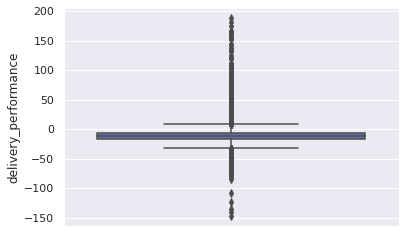

In [ ]:
sns.boxplot(y=customer_orders["delivery_performance"]) 

In [ ]:
# Double check with data before being joined

orders["delivery_performance"] = \
(pd.to_datetime(orders["order_delivered_customer_date"]).astype("datetime64[D]")
 - pd.to_datetime(orders["order_estimated_delivery_date"]).astype("datetime64[D]")).dt.days

In [ ]:
orders[orders["delivery_performance"]>=100]

#### Order values
`Order_items` table lists each payment method (even for the same order) in a separate line. Therefore, we need to transform it to table in which one order is one line.

Remember the long and wide table formats? We can do the above by using `pivot_table` command.

In [ ]:
order_values = order_payments.pivot_table(index="order_id", columns="payment_type", values="payment_value").reset_index()

order_values.fillna(0, inplace=True)

# Calculate order total value
order_values["total_value"] = order_values.sum(axis=1)

In [ ]:
order_values.head()

payment_type,order_id,boleto,credit_card,debit_card,not_defined,voucher,total_value
0,00010242fe8c5a6d1ba2dd792cb16214,0.0,72.19,0.0,0.0,0.0,72.19
1,00018f77f2f0320c557190d7a144bdd3,0.0,259.83,0.0,0.0,0.0,259.83
2,000229ec398224ef6ca0657da4fc703e,0.0,216.87,0.0,0.0,0.0,216.87
3,00024acbcdf0a6daa1e931b038114c75,0.0,25.78,0.0,0.0,0.0,25.78
4,00042b26cf59d7ce69dfabb4e55b4fd9,0.0,218.04,0.0,0.0,0.0,218.04


With `order_values`, we now can join it with the above table to calculate the total purchases by month.

In [ ]:
customer_orders_w_value = pd.merge(customer_orders,
                                   order_values,
                                   on="order_id",
                                   how="left")

In [ ]:
customer_orders_w_value.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,purchase_date,purchase_month,delivery_performance,boleto,credit_card,debit_card,not_defined,voucher,total_value
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00,2017-05-16,2017-05-01,-11.0,0.0,146.87,0.0,0.0,0.0,146.87
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00,2018-01-12,2018-01-01,-8.0,0.0,335.48,0.0,0.0,0.0,335.48
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13 00:00:00,2018-05-19,2018-05-01,1.0,0.0,157.73,0.0,0.0,0.0,157.73
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10 00:00:00,2018-03-13,2018-03-01,-13.0,0.0,173.30,0.0,0.0,0.0,173.30
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15 00:00:00,2018-07-29,2018-07-01,-6.0,0.0,252.25,0.0,0.0,0.0,252.25


#### Other variables

Other variables or information can be extracted in the same way before joining to have the final dataset. Below is the example of order review (assuming that reviews users have added are indicator of their satisfaction and therefore, can correlate with their purchases next month)

First, we need to check if there are orders with multiple reviews. It is important because when joining, if there are multiple reviews for one order, that order will be repeated in the result table, leading to wrong aggregation later.

In case there are multiple reviews, we can consider taking average review score.

In [ ]:
# Number of reviews for each order
order_reviews.groupby("order_id").agg({"review_id":"nunique"}).reset_index().sort_values("review_id", ascending=False)

,order_id,review_id
77922,c88b1d1b157a9999ce368f218a407141,3
54919,8e17072ec97ce29f0e1f111e598b0c85,3
1469,03c939fd7fd3b38f8485a0f95798f1f6,3
86902,df56136b8031ecd28e200bb18e6ddb2e,3
77006,c63031aab37b1beb849bb4856afd4f13,2
...,...,...
33244,5598657697983e852a752bb7c10f4d01,1
33243,5597332b7eded552f104108f22b023e4,1
33242,5596ba1b51a8d6801a60712a250471a8,1
33241,55966b3807b78c9c7eaf6a2c0c820abe,1


In [ ]:
order_reviews[order_reviews["order_id"]=="c88b1d1b157a9999ce368f218a407141"]

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
1997,ffb8cff872a625632ac983eb1f88843c,c88b1d1b157a9999ce368f218a407141,3,NaN,NaN,2017-07-22 00:00:00,2017-07-26 13:41:07
83187,202b5f44d09cd3cfc0d6bd12f01b044c,c88b1d1b157a9999ce368f218a407141,5,NaN,NaN,2017-07-22 00:00:00,2017-07-26 13:40:22
90069,fb96ea2ef8cce1c888f4d45c8e22b793,c88b1d1b157a9999ce368f218a407141,5,NaN,NaN,2017-07-21 00:00:00,2017-07-26 13:45:15


In [ ]:
order_avg_review = order_reviews.groupby("order_id").agg({"review_id":"nunique",
                                                          "review_score":"mean"}).reset_index()

In [ ]:
order_avg_review.head()

,order_id,review_id,review_score
0,00010242fe8c5a6d1ba2dd792cb16214,1,5.0
1,00018f77f2f0320c557190d7a144bdd3,1,4.0
2,000229ec398224ef6ca0657da4fc703e,1,5.0
3,00024acbcdf0a6daa1e931b038114c75,1,4.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,5.0


In [ ]:
customer_orders_full = pd.merge(customer_orders_w_value,
                                order_avg_review,
                                on="order_id",
                                how="left")

In [ ]:
customer_orders_full.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,purchase_date,purchase_month,delivery_performance,boleto,credit_card,debit_card,not_defined,voucher,total_value,review_id,review_score
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00,2017-05-16,2017-05-01,-11.0,0.0,146.87,0.0,0.0,0.0,146.87,1,4.0
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00,2018-01-12,2018-01-01,-8.0,0.0,335.48,0.0,0.0,0.0,335.48,1,5.0
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13 00:00:00,2018-05-19,2018-05-01,1.0,0.0,157.73,0.0,0.0,0.0,157.73,1,5.0
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10 00:00:00,2018-03-13,2018-03-01,-13.0,0.0,173.30,0.0,0.0,0.0,173.30,1,5.0
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15 00:00:00,2018-07-29,2018-07-01,-6.0,0.0,252.25,0.0,0.0,0.0,252.25,1,5.0


From this table, we can aggregate to have data for each customer in each month.

In [ ]:
customer_profile = customer_orders_full\
.groupby(["customer_unique_id","purchase_month"])\
.agg({"order_id":"nunique",
      "total_value":"sum",
      "credit_card":"sum",
      "debit_card":"sum",
      "voucher":"sum",
      "review_id":"sum",
      "review_score":"mean",
      "order_status": lambda x: (x=="cancelled").sum(),
      "delivery_performance": lambda x: (x > 0).sum()})\
.reset_index().sort_values("order_id", ascending=False)

`customer_profile` --> Clean + Create new necessary variables (features) --> YOUR_DATA_SET

In [ ]:
customer_profile["purchase_month"] = pd.to_datetime(customer_profile["purchase_month"])

In [ ]:
customer_profile["lagged_month"] = customer_profile.apply(lambda x: x['purchase_month'] + pd.DateOffset(months = 1), axis=1)

In [ ]:
customer_profile.head()

,customer_unique_id,purchase_month,nb_orders,total_purchases,paid_by_credit,paid_by_debit,voucher_redeemed,nb_reviews,avg_review_score,canceled_orders,late_delivery,lagged_month
7325,12f5d6e1cbf93dafd9dcc19095df0b3d,2017-01-01,6,110.72,0.00,0.0,0.0,6,5.0,0,0.0,2017-02-01
50622,83e7958a94bd7f74a9414d8782f87628,2017-01-01,4,73.48,0.00,0.0,0.0,4,5.0,0,0.0,2017-02-01
76793,c8460e4251689ba205045f3ea17884a1,2018-08-01,4,4655.91,4655.91,0.0,0.0,4,4.0,0,0.0,2018-09-01
67755,b08fab27d47a1eb6deda07bfd965ad43,2017-09-01,4,477.34,0.00,0.0,0.0,4,4.5,0,0.0,2017-10-01
62196,a239b8e2fbce33780f1f1912e2ee5275,2017-02-01,4,518.50,518.50,0.0,0.0,4,5.0,0,0.0,2017-03-01


### Combine customer profile with itself to create the master dataset in which we have both dependent and independent variables.

In [ ]:
customer_master_dataset = pd.merge(# We take the total_purchases of `current` month as dependent variable
                                   customer_profile[["customer_unique_id","purchase_month","total_purchases"]],
                                   # We take the variables from `last month` as independent variables
                                   customer_profile.loc[:, customer_profile.columns != "purchase_month"],
                                   # Keys from the first table we use to join
                                   left_on=["customer_unique_id","purchase_month"],
                                   # Keys from the second table we use to join
                                   right_on=["customer_unique_id","lagged_month"],
                                   how="left")



In [ ]:
customer_master_dataset.head()

## EDA

In [ ]:
# Remove outliers. Can reference back to the example covered in class.




In [ ]:
# Remove missing values




In [ ]:
## Inspect the data with pairplot

# sns.pairplot(YOUR_DATA_SET)

In [ ]:
# Or inspect the correlation between variables

# sns.heatmap(YOUR_DATA_SET.corr(), linewidth=1, annot=True)

## YOUR_DATA_SET:

Assume that you are at 2016-09-30: sales of 2016-10 is the dependent variable. 

## Running a simple linear regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [ ]:
# The cleaned dataset



In [ ]:
## Choose the variables you will use. X holds all independent variables, y is the dependent variable

x = YOUR_DATA_SET[[VARIABLE_LIST]]
y = YOUR_DATA_SET[["total_purchase"]]

In [ ]:
# Here test set accounts for 30% of the whole dataset. You can choose a different proportion

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 50)

lm = LinearRegression()
lm.fit(x_train, y_train)

In [ ]:
print("Coeffs are: ", lm.coef_[0])
print("Intercept: ", lm.intercept_)

In [ ]:
# Visualize the prediction results
result = lm.predict(x_test)

plt.scatter(y_test, result)
plt.xlabel("Actual values")
plt.ylabel("Predicted values")

In [ ]:
print('R^2 of test set', metrics.r2_score(y_test, result))
print('MSE of test set: ', metrics.mean_squared_error(y_test,result))

### Running with more predictors

In [ ]:
# Write your code here



## Checking the residuals

In [ ]:
# Write your code here



# Problem 2: Product description and sales

For a seller on ecommerce platform, the way to present your products to customers is very important, especially when there are many similar or exactly the same products under each category. As the platform, you want to consult sellers on this in which every detail should be carefully selected.

In this dataset, we have the information about product name, product description length and the number of product photos uploaded. See if you can give sellers advice on the way to optimally present their products on the site.

The process of solving this problem is the same as the example presented in lecture. However, there are certain remarks, as follow:

In the example of shipping fee, sellers decide the shipping fee but they have little control over predictors such as distance, product weight. We are trying to uncover sellers with witty behavior in setting the shipping fee.

In this example, sellers have control over the number of photos to upload, the naming of the product. They might be interested in sales of their products compared to similar products of the same category.

Also, intuitively, we will want a product name or description not too short, not long. Hence, you need to think about how we can model such a relationship in a linear regression? (Refer back to the slide for more details.)